# Fake News Detection

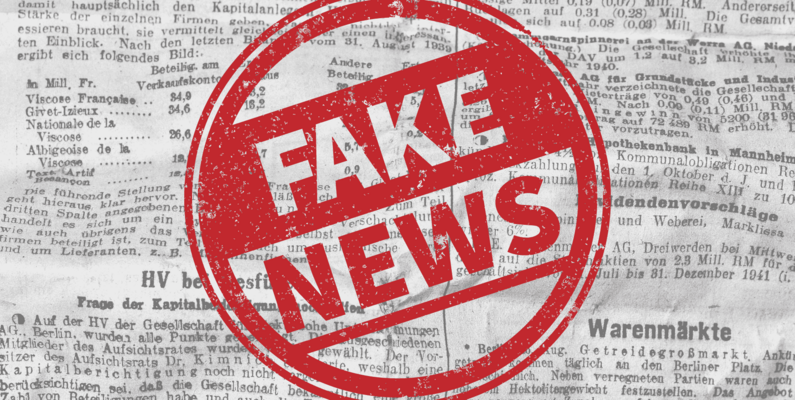

This dataset can be used for various applications such as:

- Training machine learning models to detect fake news in real-time streams of social media posts or news articles.
- Developing natural language processing (NLP) algorithms that can identify patterns in language use that are indicative of fake news.
- Creating explainable models that can provide insights into why certain articles are classified as fake news.
- Evaluating the effectiveness of different feature engineering techniques and machine learning algorithms for detecting fake news.
- Building applications that can help users make informed decisions about whether to trust a news article or not.

Label Description
- 0 - Real
- 1 - Fake

## Loading the Dependencies

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
# Printing the Stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## Data Pre-processing

In [21]:
# Loading the data into pandas DataFrame
fakenews = pd.read_csv('fakenews.csv')

fakenews.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [22]:
print(fakenews.shape)
print(fakenews.columns)

(4986, 2)
Index(['text', 'label'], dtype='object')


In [23]:
# Checking for missing values in the dataset
fakenews.isnull().sum()

text     0
label    0
dtype: int64

#### Stemming: 

- Stemming is the process of reducing the words to its Root word

example:

actor, actress, acting --> act

In [24]:
porter_stemmer = PorterStemmer()

In [25]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [porter_stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [26]:
print(fakenews['text'])

0       Get the latest from TODAY Sign up for our news...
1       2d  Conan On The Funeral Trump Will Be Invited...
2       It’s safe to say that Instagram Stories has fa...
3       Much like a certain Amazon goddess with a lass...
4       At a time when the perfect outfit is just one ...
                              ...                        
4981    The storybook romance of WWE stars John Cena a...
4982    The actor told friends he’s responsible for en...
4983    Sarah Hyland is getting real.  The Modern Fami...
4984    Production has been suspended on the sixth and...
4985    A jury ruled against Bill Cosby in his sexual ...
Name: text, Length: 4986, dtype: object


In [27]:
# Separating into X and y
X = fakenews['text'].values
y = fakenews['label'].values

#printing the shape of X and y
print(X.shape)
print(y.shape)

# showing the X and y
print(X)
print(y)

(4986,)
(4986,)
['Get the latest from TODAY Sign up for our newsletter  No one ever truly gets over losing a loved one, and Blake Shelton is no exception. He was just 14 when his older brother Richie died on Nov. 13, 1990. And, as Shelton noted in a tweet Monday, "It changed my life forever."  Richie was 24 when he died in a car accident in the Sheltons\' home state of Oklahoma. Two years ago, Shelton sent out a message for the 25th anniversary of his loss:  Richie, who was Blake\'s half-brother (they shared a mother), was a passenger in a car that collided with a school bus in Ada, south of Oklahoma City.  Richie, driver Redena McManus and a 3-year-old boy, Christopher McManus, all died during or shortly after the collision, while the bus driver and passengers were uninjured, according to police reports.  The accident has clearly remained with Blake, who told 60 Minutes in 2014, "I remember picking up the phone to call him a week after he was dead, to tell him something. I was picking

In [28]:
# Converting the text data into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [29]:
# Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3988, 63922)

(998, 63922)

(3988,)

(998,)

In [30]:
# Training the model --> Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Testing the model
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, y_test)

print(f'Accuracy: {test_accuracy}')

# Confusion Matrix
confusion_matrix(X_test_prediction, y_test)


# Testing the model with a news
def detect_fake_news(news):
    news = stemming(news)
    news = vectorizer.transform([news])
    prediction = model.predict(news)
    return prediction


Accuracy: 0.7735470941883767
